#In this notebook, we will see how dataframes merge with each other either horizontally and vertically.

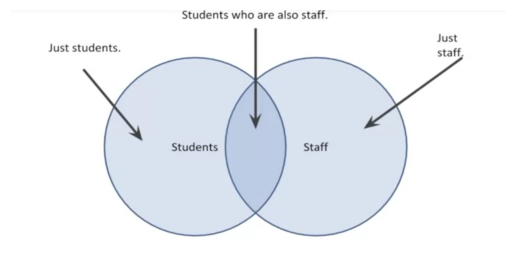

In [3]:
#Let's Bring Image - 1
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image from file
img = mpimg.imread('venn1.png')

# Display the image inline in the notebook
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

1st Circle represents population of students and the 2nd circle represents staff. There is a overlap which is the population of students working as staff.

iF WE WANT TO GET ALL INFO -> We call it union or full outer join.
Let's Bring Image -2 to demonstrate.


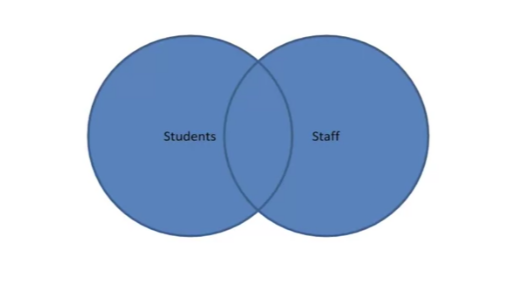

In [4]:
#Let's Bring Image - 2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image from file
img = mpimg.imread('venn2.png')

# Display the image inline in the notebook
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

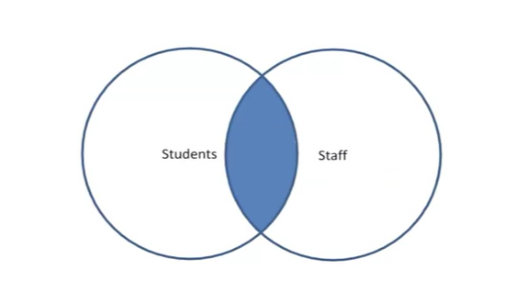

In [5]:
#What about students who are both staff and students this can be called intersection or inner join
#Let's bring Image - 3 to demonstrate
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image from file
img = mpimg.imread('venn3.png')

# Display the image inline in the notebook
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

In [6]:
#Let's see how this works in pandas.
import pandas as pd
staff_pd = pd.DataFrame([{'Name':'Shaurya','Role':'Maths Instructor'}
                         ,{'Name':'Sunil','Role':'Maths Teacher'}
                         ,{'Name':'Madhur','Role':'Librarian'}])
staff_pd

<ipython-input-6-8ebe6fcc7474>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Name,Role
0,Shaurya,Maths Instructor
1,Sunil,Maths Teacher
2,Madhur,Librarian


In [7]:
staff_pd = staff_pd.set_index('Name')
staff_pd

,Role
Name,
Shaurya,Maths Instructor
Sunil,Maths Teacher
Madhur,Librarian


In [8]:
#Let's create a dataframe for students
student_pd = pd.DataFrame([{'Name':'Shaurya','Course':'AIML'},
                          {'Name':'Sachin','Course':'AIML'},
                         {'Name':'Madhur','Course':'ECE'}])
student_pd

,Name,Course
0,Shaurya,AIML
1,Sachin,AIML
2,Madhur,ECE


In [10]:
student_pd=student_pd.set_index('Name')
student_pd

,Course
Name,
Shaurya,AIML
Sachin,AIML
Madhur,ECE


There is some overlap in data like madhur and Shaurya are both students and staff. But that's not the case with Sunil And Sachin. Both df are indexed with Name along value we want to merge them on.

In [12]:
#Union -> Call merge() and set how to outer
total_pd = pd.merge(student_pd,staff_pd,how='outer',left_index=True,right_index=True)
total_pd

,Course,Role
Name,,
Madhur,ECE,Librarian
Sachin,AIML,NaN
Shaurya,AIML,Maths Instructor
Sunil,NaN,Maths Teacher


In [13]:
#Intersection -> Call merge() and set how to inner
inter_pd = pd.merge(student_pd,staff_pd,how='inner',left_index=True,right_index=True)
inter_pd

,Course,Role
Name,,
Shaurya,AIML,Maths Instructor
Madhur,ECE,Librarian


There are two other common use cases when merging DataFrames, and both are examples of what we would call set addition. The first is when we want to get a list of all staff regardless of whether they're students or not. But if there were students, we'd want to get their student details as well. To do this, we would use a left join. It's important to note that the order of DataFrames in this function, the first DataFrame is the left DataFrame and the second is the right.

In [14]:
left_pd = pd.merge(student_pd,staff_pd,how='left',left_index=True,right_index=True)
left_pd # -> WIll give all info about student_pd and also students who are working as staff

,Course,Role
Name,,
Shaurya,AIML,Maths Instructor
Sachin,AIML,NaN
Madhur,ECE,Librarian


right_pd = pd.merge(student_pd,staff_pd,how='right',left_index=True,right_index=True)
right_pd

In [18]:
#Another Way Of merging dataframes using on
student_pd = student_pd.reset_index()
staff_pd = staff_pd.reset_index()
ano_mer_pd = pd.merge(student_pd,staff_pd,on='Name',how='outer')
ano_mer_pd

,index_x,Name,Course,index_y,Role
0,2.0,Madhur,ECE,2.0,Librarian
1,1.0,Sachin,AIML,NaN,NaN
2,0.0,Shaurya,AIML,0.0,Maths Instructor
3,NaN,Sunil,NaN,1.0,Maths Teacher


In [ ]:
#If you have common name of columns in merging dataframes it will give them notations like _x and _y to differentiate b/w them. 
#Note -> You can also have a list in on parameter in that case only those values will be retained which have same values on both keys (list of elt. in on parameter)

#Pull Data -> We will read it later.
#End Of Merge DataFrames.